In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
from plotly.subplots import make_subplots
from datetime import datetime

house_df = pd.read_excel('/data/notebook_files/datasets/house.xls')

house_df2 = house_df.rename (columns=
{'Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and  region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)' : 'Region',
 'Unnamed: 1': 'Year',  
 'Unnamed: 2' : 'Quarter',
 'Unnamed: 4' : 'New dwellings',
 'Unnamed: 6' : 'Other dwellings',
 'Unnamed: 8' : 'All dwellings',
 'Unnamed: 10' : 'First time buyers',
 'Unnamed: 12' : 'Former owner occupiers',
 })

house_df2

,Region,Year,Quarter,Unnamed: 3,New dwellings,Unnamed: 5,Other dwellings,Unnamed: 7,All dwellings,Unnamed: 9,First time buyers,Unnamed: 11,Former owner occupiers
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,New dwellings,NaN,Other dwellings4,NaN,All dwellings,NaN,First time buyers,NaN,Former owner occupiers
2,NaN,NaN,NaN,NaN,Price,NaN,Price,NaN,Price,NaN,Price,NaN,Price
3,NaN,NaN,NaN,NaN,£,NaN,£,NaN,£,NaN,£,NaN,£
4,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029,Contact:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Source: Regulated Mortgage Survey
2030,Telephone: 01633 456400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
columns = list(house_df2.columns)

columns

['Region',
 'Year',
 'Quarter',
 'Unnamed: 3',
 'New dwellings',
 'Unnamed: 5',
 'Other dwellings',
 'Unnamed: 7',
 'All dwellings',
 'Unnamed: 9',
 'First time buyers',
 'Unnamed: 11',
 'Former owner occupiers']

In [8]:
print("Missing values distribution:")
print(house_df2.isnull().mean())
print("")

Missing values distribution:
Region                    0.980807
Year                      0.753937
Quarter                   0.031496
Unnamed: 3                1.000000
New dwellings             0.037894
Unnamed: 5                1.000000
Other dwellings           0.037894
Unnamed: 7                1.000000
All dwellings             0.037894
Unnamed: 9                1.000000
First time buyers         0.037894
Unnamed: 11               1.000000
Former owner occupiers    0.037402
dtype: float64



In [9]:
house_df3 = house_df2.drop(columns=['Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11','Quarter'])




house_df3 = house_df3.assign(Region=house_df3['Region'].shift(3))
house_df3['Year'] = house_df3['Year'].interpolate(method='pad', limit=3)

column_names = ('Year','New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers')

def covert_to_int(dataframe,name):
        return pd.to_numeric(dataframe[name],errors='coerce').fillna(0).astype(int)
        
for value in column_names:
    house_df3[value]=covert_to_int(house_df3,value)


#house_df3['Year']= pd.to_numeric(house_df3['Year'],errors='coerce').fillna(0).astype(int)
#house_df3['New dwellings']= pd.to_numeric(house_df3['New dwellings'],errors='coerce').fillna(0).astype(int)
#house_df3['Other dwellings']= pd.to_numeric(house_df3['Other dwellings'],errors='coerce').fillna(0).astype(int)
#house_df3['All dwellings']= pd.to_numeric(house_df3['All dwellings'],errors='coerce').fillna(0).astype(int)
#house_df3['First time buyers']= pd.to_numeric(house_df3['First time buyers'],errors='coerce').fillna(0).astype(int)


house_df3.drop(np.r_[0:7,2019:2032], inplace=True)

columns = ['Region','Year','New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers' ]

for column in columns:
    house_df3[column] = house_df3[column].fillna("")
    
    

house_df3

,Region,Year,New dwellings,Other dwellings,All dwellings,First time buyers,Former owner occupiers
7,United Kingdom,1992,77360,60210,62255,46919,76988
8,K02000001,1992,69893,62513,63712,48578,79493
9,,1992,70043,57193,59230,44831,76992
10,,1993,72700,58345,60213,46300,77787
11,,1993,73289,60196,61895,48566,78151
...,...,...,...,...,...,...,...
2014,,2021,202498,174913,179935,150733,220168
2015,,2021,197388,165070,171830,148031,215325
2016,,2022,215044,178526,184707,151759,239818
2017,,2022,225815,182400,190623,157540,246209


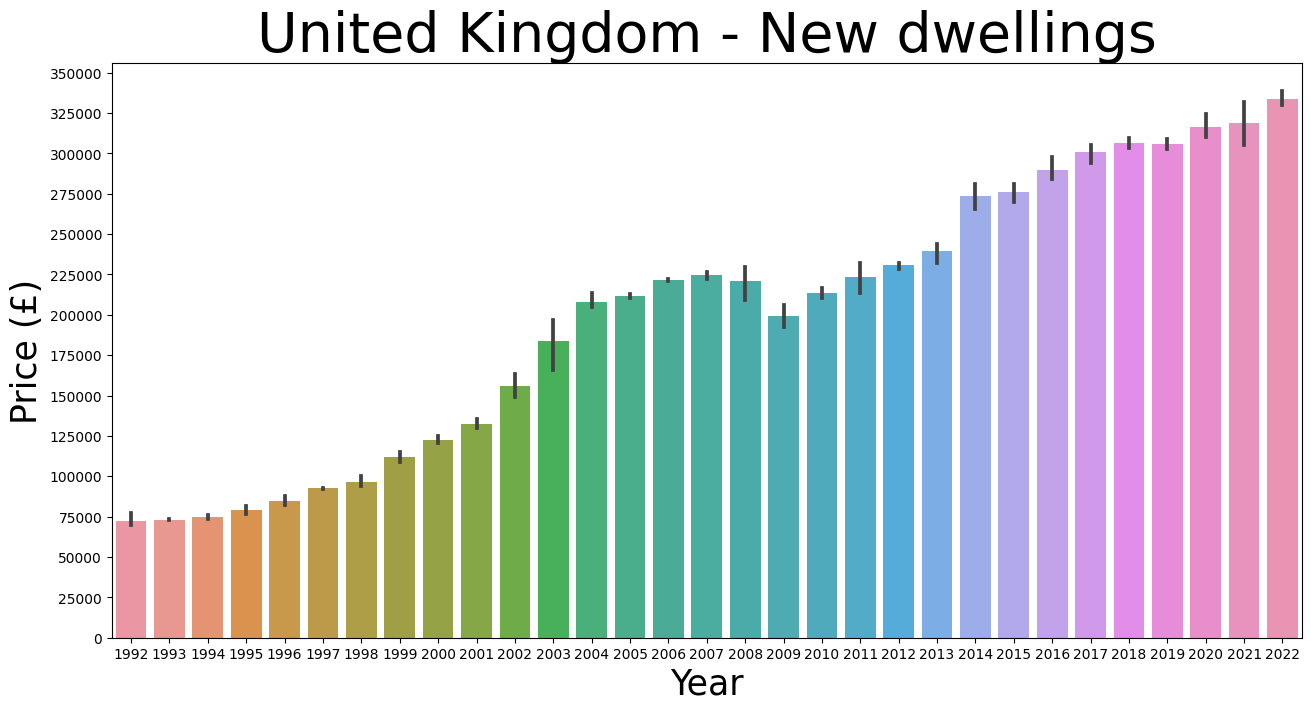

In [10]:
house_df3_United_Kingdom = house_df3.loc[0:128]
fig = plt.figure(figsize=(13,7), dpi=100, layout='constrained', facecolor='white', edgecolor='black', frameon=True)
ax = sns.barplot(data=house_df3_United_Kingdom, x='Year', y='New dwellings')
plt.title("United Kingdom - New dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(ticks=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000])
plt.show()

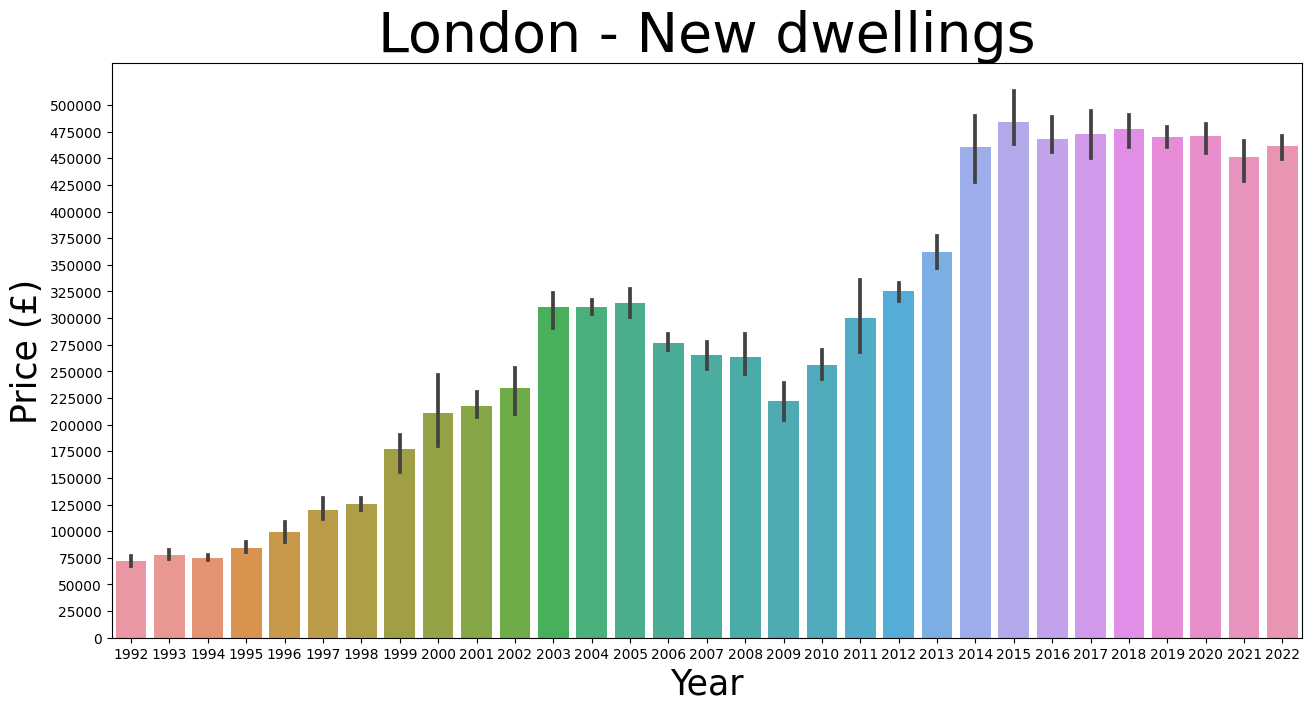

In [11]:
house_df3_London = house_df3.loc[1267:1388]
fig = plt.figure(figsize=(13,7), dpi=100, layout='constrained', facecolor='white', edgecolor='black', frameon=True)
ax = sns.barplot(data=house_df3_London, x='Year', y='New dwellings')
plt.title("London - New dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(ticks=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000])
plt.show()

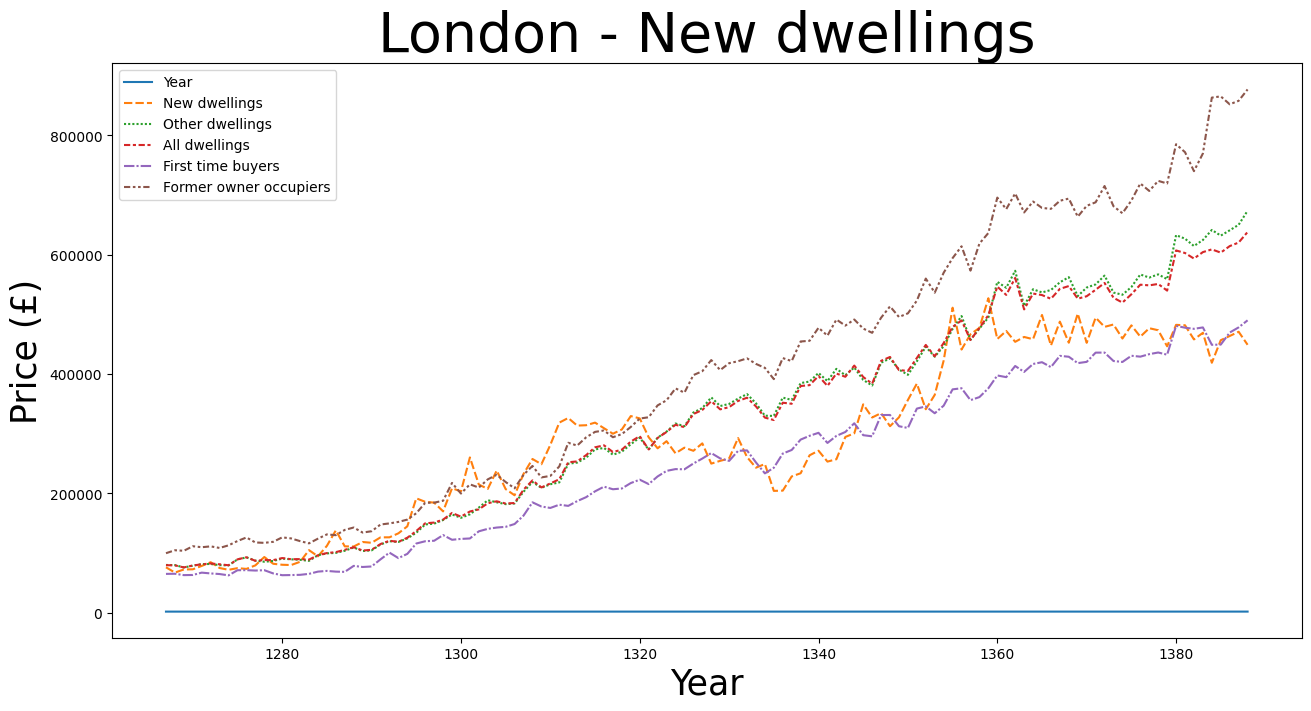

In [16]:
house_df3_London = house_df3.loc[1267:1388]
fig = plt.figure(figsize=(13,7), dpi=100, layout='constrained', facecolor='white', edgecolor='black', frameon=True)
ax = sns.lineplot(data=house_df3_London)
plt.title("London - New dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Price (£)", fontsize=25)
#plt.yticks(ticks=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000])
plt.show()